In [1]:
library(dplyr)
library(ggplot2)
library(readr)
options(dplyr.width = Inf)

options(jupyter.plot_mimetypes = 'image/png')  # Shows plots inline


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [9]:
df <- read_csv("~/Kaggle/Dive Into Water/Github Upload/PropertiesPerLake.csv", na = "#N/A")

df <- filter(df, AvgPhosphorus <= 0.3)

Parsed with column specification:
cols(
  LakeName = col_character(),
  Year = col_integer(),
  ResidentialCount = col_integer(),
  AgriculturalCount = col_integer(),
  CommercialCount = col_integer(),
  IndustrialCount = col_integer(),
  PublicCount = col_integer(),
  AvgSeasonalLakeGrade = col_integer(),
  AvgSecchiDepth = col_double(),
  AvgPhosphorus = col_double(),
  ResidentialProportion = col_double(),
  AgriculturalProportion = col_double(),
  CommercialProportion = col_double(),
  IndustrialProportion = col_double(),
  PublicProportion = col_double(),
  TotalCount = col_integer()
)


# Data Description:

This dataset contains information about the counts and proportion of property types (bucketed into residential, agricultural, commercial, industrial, and public) within a 10km distance of a lake by year.  Additionally, it contains a few measures of water quality:

- AvgSeasonalLakeGrade (0 - 4, 4 being best): An annual rating given to a lake.  Compiled from readings taken from May through September.
- AvgSecchiDepth: The average annual depth (in inches) from readings taken with a Secchi disk throughout the year.  Higher quantities indicate water clarity.
- AvgPhosphorus: The average phosphorus content (in parts per million) taken from readings throughout the year.  Quantities below 0.01 indicate a lack of resources for plant live, and quantities above 0.1 are considered eutrophic - when the lake is too rich in nutrients, and results in the decomposition from a dense plant population killing animal life through depriving it of oxygen

These health measures are calculated averages of readings across the year.  Outliers and lakes/year combinations with a low number of readings were removed to prevent them from skewing the results.

Here is a preview of the data along with the summary statistics:

In [11]:
head(df)
summary(df)

LakeName,Year,ResidentialCount,AgriculturalCount,CommercialCount,IndustrialCount,PublicCount,AvgSeasonalLakeGrade,AvgSecchiDepth,AvgPhosphorus,ResidentialProportion,AgriculturalProportion,CommercialProportion,IndustrialProportion,PublicProportion,TotalCount
Acorn Lake,2009,8968,11,0,27,561,NA,0.9141667,0.04333333,0.9373889,0.001149786,0.000000000,0.002822201,0.058639072,9567
Alimagnet Lake,2009,5257,0,89,0,2,1,0.7050000,0.09720000,0.9829843,0.000000000,0.016641735,0.000000000,0.000373972,5348
Ardmore Lake,2009,693,20,70,8,14,0,0.4707143,0.23071429,0.8608696,0.024844720,0.086956522,0.009937888,0.017391304,805
Armstrong Lake,2009,4572,20,8,0,465,2,1.1142857,0.05892857,0.9026654,0.003948667,0.001579467,0.000000000,0.091806515,5065
Barker Lake,2009,153,119,0,0,14,NA,1.4588571,0.00000000,0.5349650,0.416083916,0.000000000,0.000000000,0.048951049,286
Bass Lake,2009,340,103,0,0,14,3,1.9399697,0.04938461,0.7439825,0.225382932,0.000000000,0.000000000,0.030634573,457


   LakeName              Year      ResidentialCount  AgriculturalCount
 Length:830         Min.   :2009   Min.   :   37.0   Min.   :   0.00  
 Class :character   1st Qu.:2010   1st Qu.:  326.2   1st Qu.:   0.00  
 Mode  :character   Median :2011   Median : 1437.0   Median :  16.00  
                    Mean   :2011   Mean   : 2945.1   Mean   :  58.61  
                    3rd Qu.:2013   3rd Qu.: 3596.5   3rd Qu.:  56.00  
                    Max.   :2014   Max.   :22679.0   Max.   :1700.00  
                                                                      
 CommercialCount   IndustrialCount    PublicCount      AvgSeasonalLakeGrade
 Min.   :    0.0   Min.   :    0.0   Min.   :    0.0   Min.   :0.000       
 1st Qu.:    2.0   1st Qu.:    0.0   1st Qu.:   16.0   1st Qu.:1.000       
 Median :   36.0   Median :    0.0   Median :   58.0   Median :2.000       
 Mean   :  195.5   Mean   :   98.5   Mean   :  172.2   Mean   :2.112       
 3rd Qu.:  173.8   3rd Qu.:   30.0   3rd Qu.:  149.0

This function was taken from the [Cookbook for R](http://www.cookbook-r.com/Graphs/Multiple_graphs_on_one_page_(ggplot2%29) to imitate a facet grid with multiple plots.

In [12]:
# Multiple plot function
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
    library(grid)
    
    # Make a list from the ... arguments and plotlist
    plots <- c(list(...), plotlist)
    
    numPlots = length(plots)
    
    # If layout is NULL, then use 'cols' to determine layout
    if (is.null(layout)) {
        # Make the panel
        # ncol: Number of columns of plots
        # nrow: Number of rows needed, calculated from # of cols
        layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                         ncol = cols, nrow = ceiling(numPlots/cols))
    }
    
    if (numPlots==1) {
        print(plots[[1]])
        
    } else {
        # Set up the page
        grid.newpage()
        pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))
        
        # Make each plot, in the correct location
        for (i in 1:numPlots) {
            # Get the i,j matrix positions of the regions that contain this subplot
            matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))
            
            print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                            layout.pos.col = matchidx$col))
        }
    }
}

**Y** = Avg phosphorus

**X** = Proportion of proprerty type

**Color** = Average Lake Grade

**Size** = Density

**Green horizontal line** = Eutrophic.  Anything over this is considered bad for lake health.

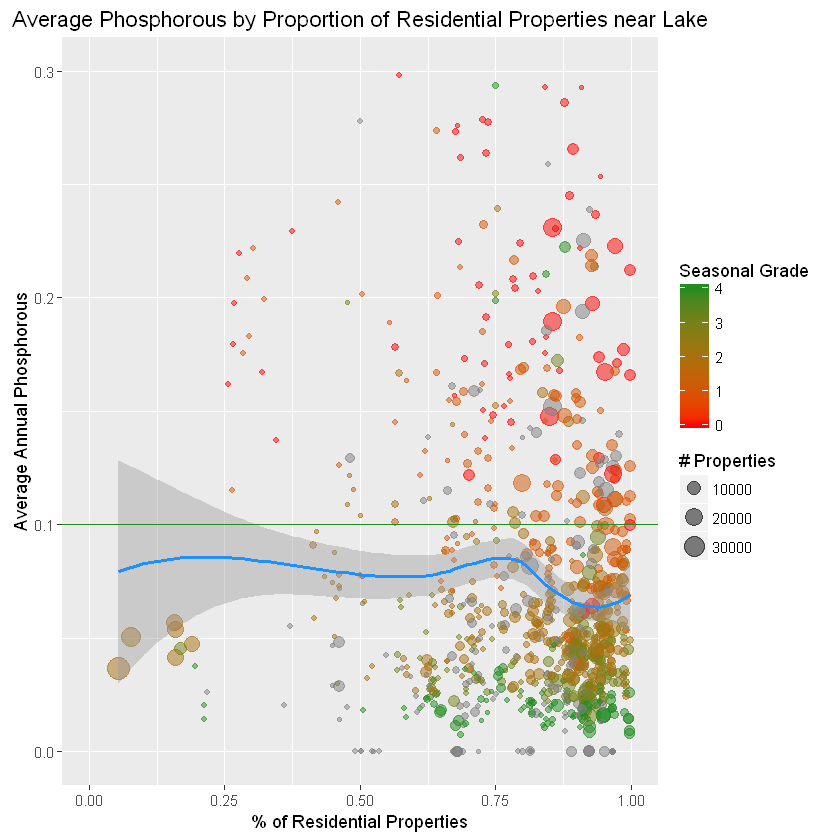

In [13]:
# Residential proportion
resPhos <- ggplot(df, aes(ResidentialProportion, AvgPhosphorus)) + geom_point(aes(color = AvgSeasonalLakeGrade, size = TotalCount), alpha = 0.5) + scale_colour_gradient(low = "red", high = "forestgreen") + geom_smooth(method = 'loess', color = 'dodgerblue') + xlim(0, 1) + ylim (0, 0.3) + labs(title = "Average Phosphorous by Proportion of Residential Properties near Lake", x = "% of Residential Properties", y = "Average Annual Phosphorous", color = 'Seasonal Grade', size = '# Properties') + geom_hline(yintercept = 0.1, color = 'forestgreen')

resPhos

Examinining the remaining properties:

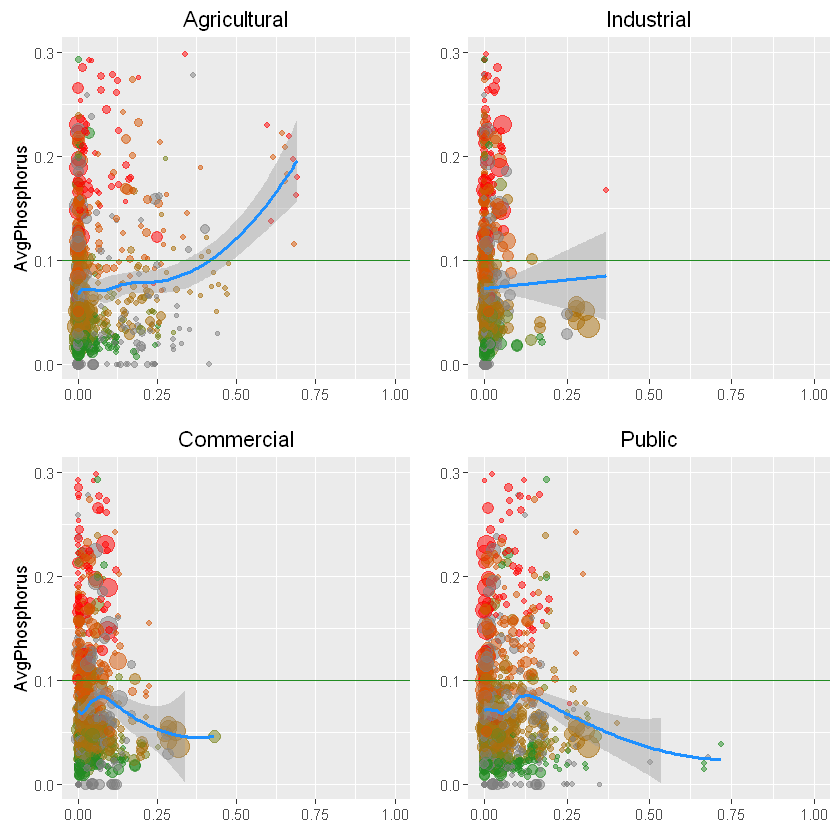

In [14]:
# Agricultural
agrPhos <- ggplot(df, aes(AgriculturalProportion, AvgPhosphorus)) +
             geom_point(aes(color = AvgSeasonalLakeGrade, size = TotalCount), alpha = .5) +
             scale_colour_gradient(low = "red", high = "forestgreen") +
             geom_smooth(method = 'loess', color = 'dodgerblue') +
             xlim(0, 1) + ylim(0, 0.3) + geom_hline(yintercept = 0.1, color = 'forestgreen') + 
             theme(legend.position = "none")  # Legend disabled to save space on slide containing facet grid

# Commercial
comPhos <- ggplot(df, aes(CommercialProportion, AvgPhosphorus)) +
             geom_point(aes(color = AvgSeasonalLakeGrade, size = TotalCount), alpha = .5) +
             scale_colour_gradient(low = "red", high = "forestgreen") +
             geom_smooth(method = 'loess', color = 'dodgerblue') +
             xlim(0, 1) + ylim(0, 0.3) + geom_hline(yintercept = 0.1, color = 'forestgreen') + 
             theme(legend.position = "none")

# Industrial
indPhos <- ggplot(df, aes(IndustrialProportion, AvgPhosphorus)) +
             geom_point(aes(color = AvgSeasonalLakeGrade, size = TotalCount), alpha = .5) +
             scale_colour_gradient(low = "red", high = "forestgreen") +
             geom_smooth(method = 'lm', color = 'dodgerblue') +
             xlim(0, 1) + ylim(0, 0.3) + geom_hline(yintercept = 0.1, color = 'forestgreen') + 
             theme(legend.position = "none")

# Public
pubPhos <- ggplot(df, aes(PublicProportion, AvgPhosphorus)) +
             geom_point(aes(color = AvgSeasonalLakeGrade, size = TotalCount), alpha = .5) +
             scale_colour_gradient(low = "red", high = "forestgreen") +
             geom_smooth(method = 'loess', color = 'dodgerblue') +
             xlim(0, 1) + ylim(0, 0.3) + geom_hline(yintercept = 0.1, color = 'forestgreen') + 
             theme(legend.position = "none")


multiplot(agrPhos + labs(title = "Agricultural", x = element_blank()), comPhos + labs(title = "Commercial", x = element_blank()), indPhos + labs(title = "Industrial", x = element_blank(), y = element_blank()), pubPhos + labs(title = "Public", x = element_blank(), y = element_blank()), cols = 2)

Viewing the residential properties over time:

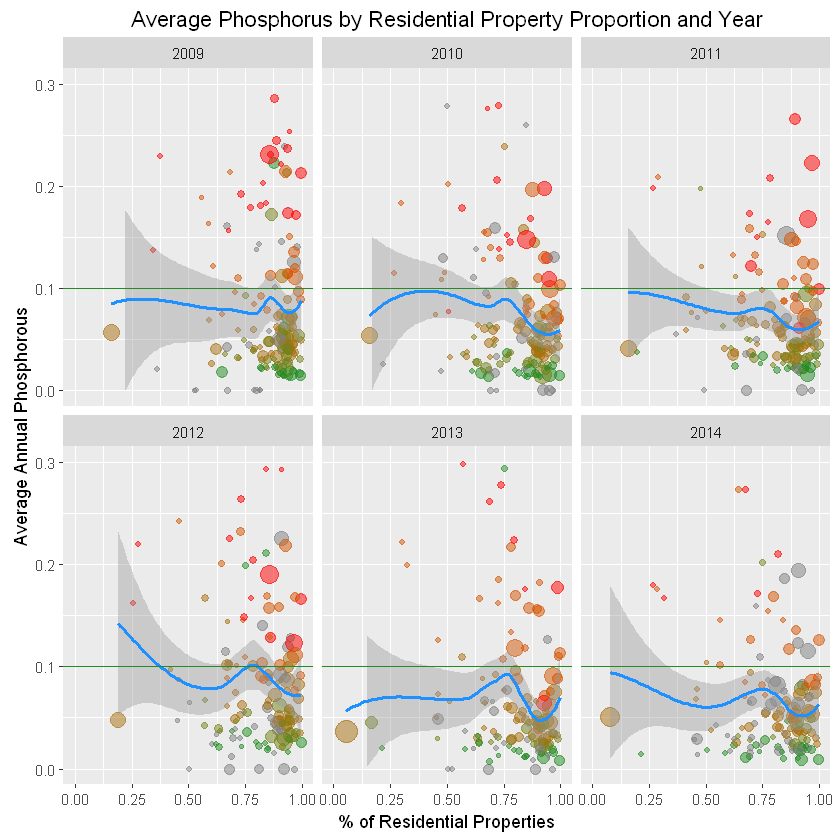

In [17]:
resPhos + facet_wrap(~ Year) + labs(title = "Average Phosphorus by Residential Property Proportion and Year", x = "% of Residential Properties", y = "Average Annual Phosphorous", color = 'Seasonal Grade', size = '# Properties') + theme(legend.position = "none")

Highly residential areas are reducing in phosphorus over time

Agricultural plots over time:

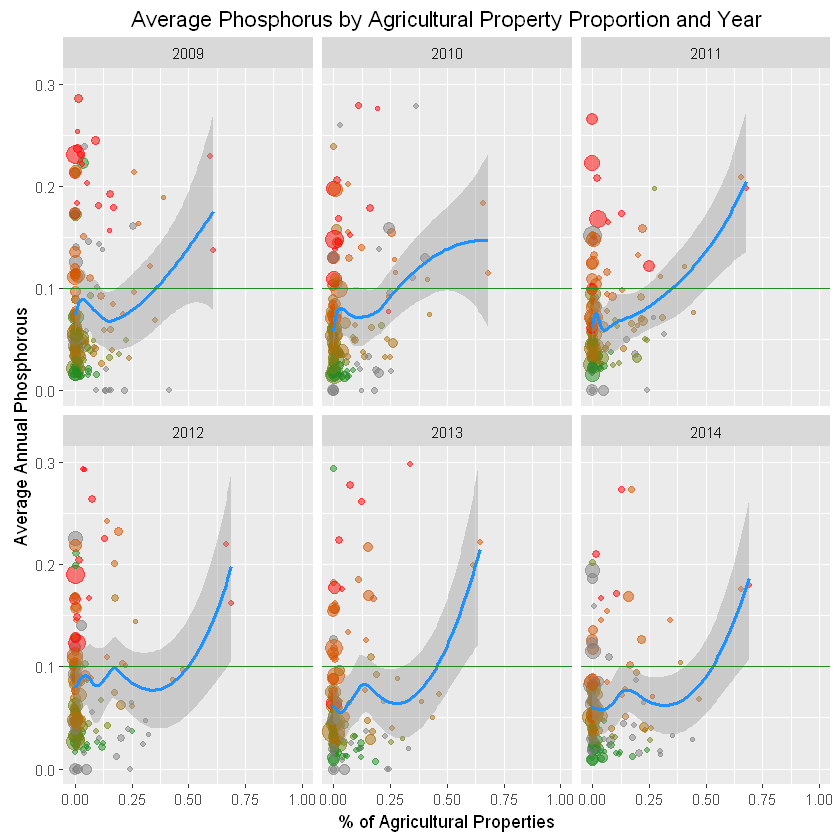

In [22]:
agrPhos + facet_wrap(~ Year) + labs(title = "Average Phosphorus by Agricultural Property Proportion and Year", x = "% of Agricultural Properties", y = "Average Annual Phosphorous", color = 'Seasonal Grade', size = '# Properties')

Moderately agricultural areas (0.2 - 0.4) are decreasing in phosphorus over time

Public:

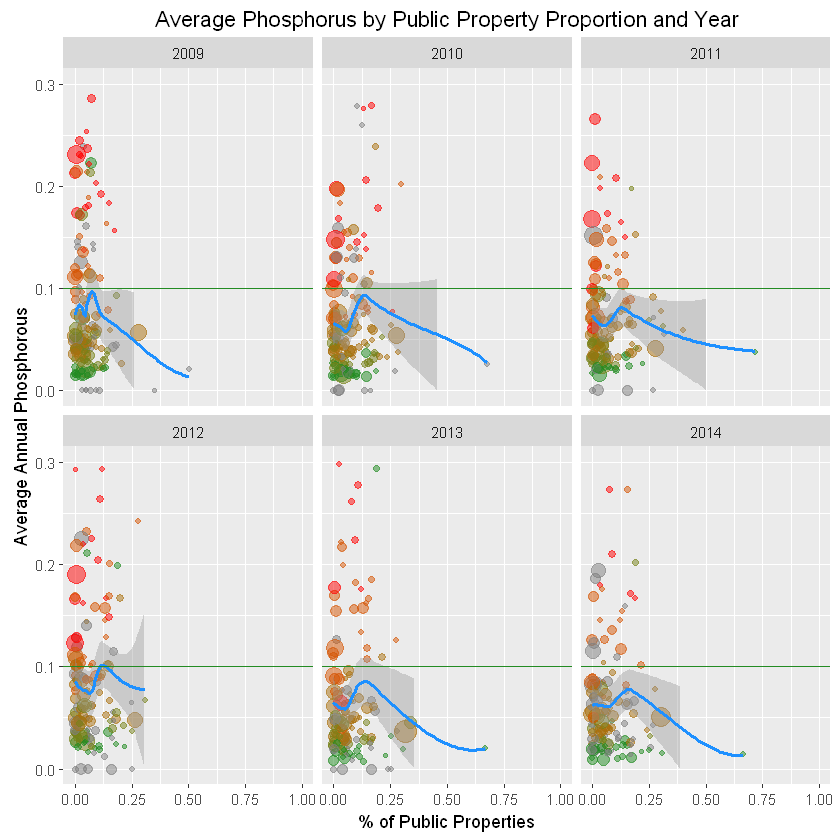

In [21]:
pubPhos + facet_wrap(~ Year) + labs(title = "Average Phosphorus by Public Property Proportion and Year", x = "% of Public Properties", y = "Average Annual Phosphorous", color = 'Seasonal Grade', size = '# Properties')

No discernable differences

Commercial and Industrial plots over time excluded due to lack of conclusions resulting from a very small overall percentage.